In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [2]:
df_dengue = pd.read_csv('../data/clean/dengue_cases.csv', index_col=0)
df_dengue

,Cases
2009-01-04,67.0
2009-01-11,50.0
2009-01-18,46.0
2009-01-25,67.0
2009-02-01,60.0
...,...
2017-11-26,20.0
2017-12-03,29.0
2017-12-10,29.0
2017-12-17,22.0


In [3]:
df_weather = pd.read_csv('../data/clean/weather_data.csv', header=[0,1], index_col=[0])
df_weather

RAINFALL                    TMAX  TMIN      TMEAN    RH        \
                min    max       mean   max   min       mean   min   max   
date                                                                       
2009-01-04      0.0    1.4   0.475000  31.7  23.6  27.775000  82.0  83.0   
2009-01-11      0.0   35.6  12.142857  33.0  23.5  28.385714  82.0  86.0   
2009-01-18      0.0   54.0  14.357143  30.7  22.3  25.771429  87.0  96.0   
2009-01-25      0.0   19.2   2.742857  33.0  23.7  28.385714  80.0  87.0   
2009-02-01      0.0   24.8   4.028571  33.0  23.3  28.100000  77.0  87.0   
...             ...    ...        ...   ...   ...        ...   ...   ...   
2017-11-26      0.0    9.8   3.257143  33.6  24.2  27.928571  74.0  89.0   
2017-12-03      0.0    0.4   0.057143  34.1  24.2  29.528571  74.0  80.0   
2017-12-10      0.0  109.8  24.342857  35.0  24.4  29.457143  72.0  81.0   
2017-12-17      0.0   31.0  10.142857  34.4  24.0  28.328571  68.0  89.0   
2017-12-24      0.0   39.4   6.128571  34.0  23.6  28.550000  70.0  86.0   

                      WIND SPEED  
                 mean       mean  
date                              
2009-01-04  82.750000   2.250000  
2009-01-11  83.857143   2.000000  
2009-01-18  90.428571   2.714286  
2009-01-25  83.428571   1.571429  
2009-02-01  82.285714   2.285714  
...               ...        ...  
2017-11-26  82.285714   1.714286  
2017-12-03  76.571429   2.142857  
2017-12-10  76.000000   1.857143  
2017-12-17  78.000000   1.285714  
2017-12-24  78.642857   1.857143  

[468 rows x 10 columns]

In [4]:
df_merged = pd.merge(df_dengue, df_weather, left_index=True, right_index=True)
df_merged.columns = ['Cases', 'RAINFALL min', 'RAINFALL max', 'RAINFALL mean', 'TMAX', 'TMIN', 'TMEAN', 'RH min', 'RH max',
                    'RH mean', 'WINDSPEED mean']
df_merged

,Cases,RAINFALL min,RAINFALL max,RAINFALL mean,TMAX,TMIN,TMEAN,RH min,RH max,RH mean,WINDSPEED mean
2009-01-04,67.0,0.0,1.4,0.475000,31.7,23.6,27.775000,82.0,83.0,82.750000,2.250000
2009-01-11,50.0,0.0,35.6,12.142857,33.0,23.5,28.385714,82.0,86.0,83.857143,2.000000
2009-01-18,46.0,0.0,54.0,14.357143,30.7,22.3,25.771429,87.0,96.0,90.428571,2.714286
2009-01-25,67.0,0.0,19.2,2.742857,33.0,23.7,28.385714,80.0,87.0,83.428571,1.571429
2009-02-01,60.0,0.0,24.8,4.028571,33.0,23.3,28.100000,77.0,87.0,82.285714,2.285714
...,...,...,...,...,...,...,...,...,...,...,...
2017-11-26,20.0,0.0,9.8,3.257143,33.6,24.2,27.928571,74.0,89.0,82.285714,1.714286
2017-12-03,29.0,0.0,0.4,0.057143,34.1,24.2,29.528571,74.0,80.0,76.571429,2.142857
2017-12-10,29.0,0.0,109.8,24.342857,35.0,24.4,29.457143,72.0,81.0,76.000000,1.857143
2017-12-17,22.0,0.0,31.0,10.142857,34.4,24.0,28.328571,68.0,89.0,78.000000,1.285714


In [5]:
df_merged.index = pd.to_datetime(df_merged.index)
# df_merged.index = df_merged.index.to_period('W')
df_merged

,Cases,RAINFALL min,RAINFALL max,RAINFALL mean,TMAX,TMIN,TMEAN,RH min,RH max,RH mean,WINDSPEED mean
2009-01-04,67.0,0.0,1.4,0.475000,31.7,23.6,27.775000,82.0,83.0,82.750000,2.250000
2009-01-11,50.0,0.0,35.6,12.142857,33.0,23.5,28.385714,82.0,86.0,83.857143,2.000000
2009-01-18,46.0,0.0,54.0,14.357143,30.7,22.3,25.771429,87.0,96.0,90.428571,2.714286
2009-01-25,67.0,0.0,19.2,2.742857,33.0,23.7,28.385714,80.0,87.0,83.428571,1.571429
2009-02-01,60.0,0.0,24.8,4.028571,33.0,23.3,28.100000,77.0,87.0,82.285714,2.285714
...,...,...,...,...,...,...,...,...,...,...,...
2017-11-26,20.0,0.0,9.8,3.257143,33.6,24.2,27.928571,74.0,89.0,82.285714,1.714286
2017-12-03,29.0,0.0,0.4,0.057143,34.1,24.2,29.528571,74.0,80.0,76.571429,2.142857
2017-12-10,29.0,0.0,109.8,24.342857,35.0,24.4,29.457143,72.0,81.0,76.000000,1.857143
2017-12-17,22.0,0.0,31.0,10.142857,34.4,24.0,28.328571,68.0,89.0,78.000000,1.285714


In [6]:
# drop RH min, RH max, TMAX, RAINFALL max, RAINFALL min when modelling
df_merged = df_merged.drop(['RH min', 'RH max', 'TMAX', 'RAINFALL max', 'RAINFALL min'], axis=1)
df_merged

,Cases,RAINFALL mean,TMIN,TMEAN,RH mean,WINDSPEED mean
2009-01-04,67.0,0.475000,23.6,27.775000,82.750000,2.250000
2009-01-11,50.0,12.142857,23.5,28.385714,83.857143,2.000000
2009-01-18,46.0,14.357143,22.3,25.771429,90.428571,2.714286
2009-01-25,67.0,2.742857,23.7,28.385714,83.428571,1.571429
2009-02-01,60.0,4.028571,23.3,28.100000,82.285714,2.285714
...,...,...,...,...,...,...
2017-11-26,20.0,3.257143,24.2,27.928571,82.285714,1.714286
2017-12-03,29.0,0.057143,24.2,29.528571,76.571429,2.142857
2017-12-10,29.0,24.342857,24.4,29.457143,76.000000,1.857143
2017-12-17,22.0,10.142857,24.0,28.328571,78.000000,1.285714


# Baseline test - ARIMA on Cases only
- https://machinelearningmastery.com/arima-for-time-series-forecasting-with-python/

### Check Stationarity of Cases using adfuller

In [7]:
from statsmodels.tsa.stattools import coint, adfuller

def check_for_stationarity(X, cutoff=0.01):
    pvalue = adfuller(X)[1]
    print(adfuller(X)[0])
    print(adfuller(X)[4])
    if pvalue < cutoff:
        print(f'p-value = {str(pvalue)} The series {X.name} is likely stationary.')
    else:
        print(f'p-value = {str(pvalue)} The series {X.name} is likely not stationary.')

In [8]:
check_for_stationarity(df_merged['Cases'])

-5.204945710860609
{'1%': -3.44455286264131, '5%': -2.8678027030003483, '10%': -2.5701057817594894}
p-value = 8.589960084412457e-06 The series Cases is likely stationary.


<AxesSubplot:>

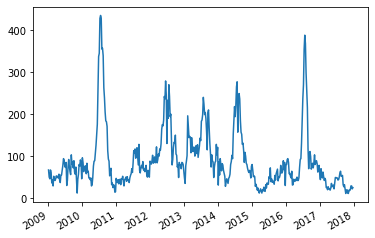

In [9]:
df_merged['Cases'].plot()

## Cases is stationary by adfuller, but by eye test there is seasonality and does not seem stationary

In [10]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

def plot_cf(X, lag):
    plt.subplots(figsize=(10,8))
    ax1 = plt.subplot(211)
#     acf = plot_acf(X.interpolate().diff()[1:], lags=lag, ax=ax1)
    acf = plot_acf(X[1:], lags=lag, ax=ax1)
    ax1.legend([X.name])
    
    ax2 = plt.subplot(212)
#     pacf = plot_pacf(X.interpolate().diff()[1:], lags=lag, ax=ax2)
    pacf = plot_pacf(X[1:], lags=lag, ax=ax2)
    ax2.legend([X.name])

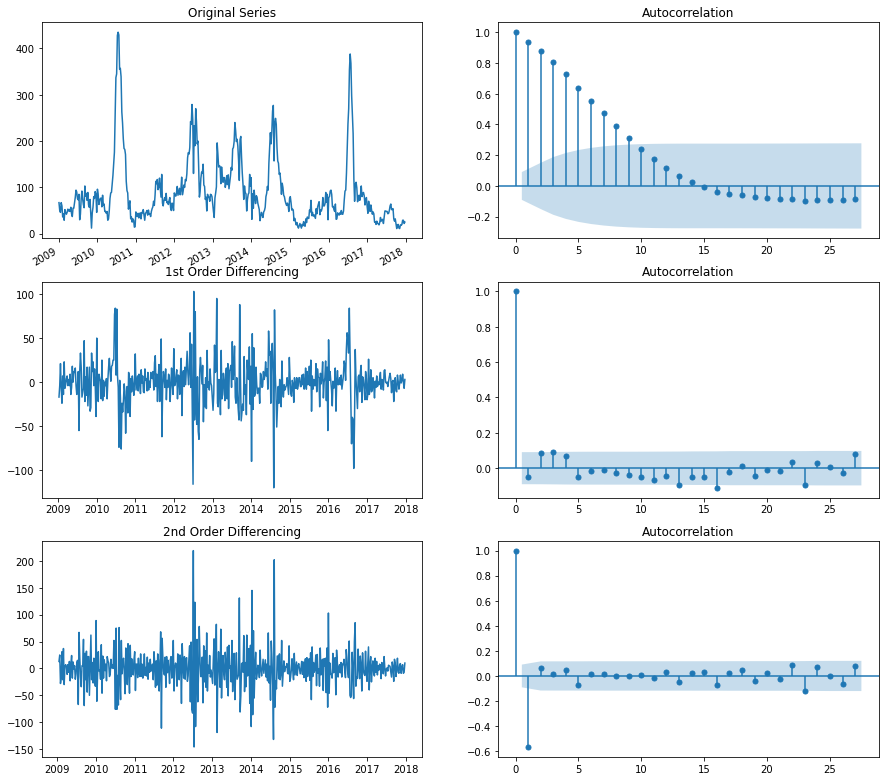

In [11]:
# Original Series
fig, axes = plt.subplots(3, 2, figsize=(15,15))
df_merged['Cases'].plot(ax=axes[0,0]); axes[0, 0].set_title('Original Series')
plot_acf(df_merged['Cases'], ax=axes[0, 1])

# 1st Differencing
axes[1, 0].plot(df_merged['Cases'].diff()); axes[1, 0].set_title('1st Order Differencing')
plot_acf(df_merged['Cases'].diff().dropna(), ax=axes[1, 1])

# 2nd Differencing
axes[2, 0].plot(df_merged['Cases'].diff().diff()); axes[2, 0].set_title('2nd Order Differencing')
plot_acf(df_merged['Cases'].diff().diff().dropna(), ax=axes[2, 1]);

### ACF for 2nd Order very high negative, 2nd order diff is over differentiated
## Try using 1st order diff

<AxesSubplot:>

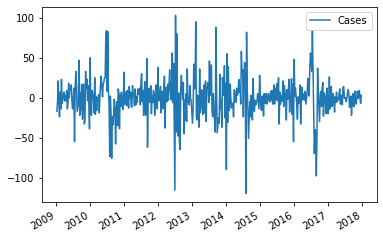

In [12]:
df_diff = pd.DataFrame(df_merged['Cases'].diff().dropna())
df_diff.columns = ['Cases']
df_diff.plot()

In [13]:
check_for_stationarity(df_diff['Cases'])

-8.852063357616048
{'1%': -3.44455286264131, '5%': -2.8678027030003483, '10%': -2.5701057817594894}
p-value = 1.5632487310981842e-14 The series Cases is likely stationary.


## Diff1 seems stationary, try using d=1

### Autocorrelation plot

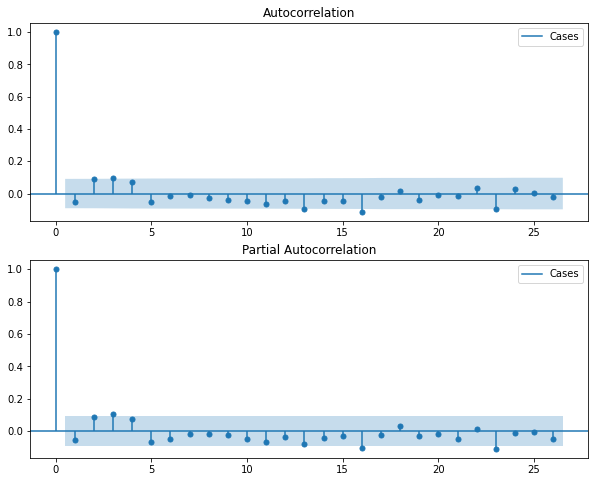

In [14]:
plot_cf(df_diff['Cases'], 26)

### Lags 3, 13, 16, 23 seem most relevant for both ACF and PACF

### Try p = 3, and q =3

In [15]:
# split into train and test sets
X = df_merged['Cases']
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]

## Rolling Forecast ARIMA - 1 week ahead using intuitive parameters

100%|██████████████████████████████| 160/160 [01:12<00:00,  2.21it/s]

Test RMSE: 20.630


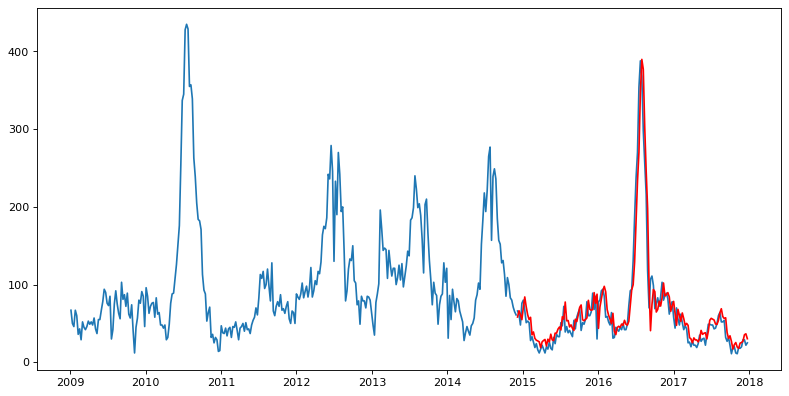

In [16]:
from tqdm import tqdm
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

warnings.filterwarnings("ignore")

history = [x for x in train]
predictions = list()

# walk-forward validation
for t in tqdm(range(len(test))):
    model = ARIMA(history, order=(3,0,3))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
#     print('predicted=%f, expected=%f' % (yhat, obs))
# evaluate forecasts
pred = pd.DataFrame(predictions, index=test.index)
rmse = np.sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
# plot forecasts against actual outcomes
plt.figure(figsize=(12, 6), dpi=80)
plt.plot(train, color='C0')
plt.plot(test, color='C0')
plt.plot(pred, color='red')
plt.show();

# Grid Search of ARIMA

In [25]:
from math import sqrt
from multiprocessing import cpu_count
from itertools import repeat
from multiprocessing import Process, Manager, Pool
from warnings import catch_warnings
from warnings import filterwarnings
from tqdm import tqdm
import traceback
from time import time, ctime

# n-step sarima forecast
def arima_forecast(history, config, n_step=1):
    order = config
    # define model
    model = ARIMA(history, order=order[0], trend=order[1])
    # fit model
    model_fit = model.fit()
    # make n step forecast
    yhat = model_fit.forecast(steps=n_step)
    return yhat[n_step-1]

# root mean squared error or rmse
def measure_rmse(actual, predicted):
    return sqrt(mean_squared_error(actual, predicted))

# walk-forward validation for univariate data
def walk_forward_validation(cfg, n_step=1):
    predictions = list()
    # seed history with training dataset
    history = [x for x in train]
    # step over each time-step in the test set
    for i in range(len(test)):
        # fit model and make forecast for history
        yhat = arima_forecast(history, cfg)
        # store forecast in list of predictions
        predictions.append(yhat)
        # add actual observation to history for the next loop
        history.append(test[i])
    predicted = pd.DataFrame(predictions, index=test[n_step:].index.union(pd.date_range(start='1/1/2018', periods=n_step, freq='W')))
    # estimate prediction error
    error = measure_rmse(test[n_step:], predictions[:-n_step])
    return error, pred

# score a model, return None on failure
def score_model(scores, cfg, n_step, l, debug=False):
    # progress bar
    l[0] += 1
    print(f"Here: {l[0]}, time: {ctime(time())}")
    
    result = None
    predicted = None
    # convert config to a key
    key = str(cfg)
    # show all warnings and fail on exception if debugging
    if debug:
        result = walk_forward_validation(cfg)
    else:
        # one failure during model validation suggests an unstable config
        try:
            # never show warnings when grid searching, too noisy
            with catch_warnings():
                filterwarnings("ignore")
                result, predicted = walk_forward_validation(cfg, n_step)
        except Exception as e:
            error = None
            raise e
    # check for an interesting result
    if result is not None:
        print(' > Model[%s] %.3f' % (key, result))
    scors.append([key, result, predicted])

# grid search configs
def grid_search(cfg_list, n_step, parallel=True):
    manager = Manager()
    scores = manager.list()
    l = manager.list()
    l.append(0)
    print('starting grid search')
    if parallel:
        try:
            with Pool(cpu_count()-2) as pool:
                pool.starmap(score_model, zip(repeat(scores), cfg_list, repeat(n_step), repeat(l)))
        except Exception as e:
            raise e
    else:
        scores = [score_model(cfg) for cfg in tqdm(cfg_list)]
    # remove empty results
    scores = list([r for r in scores if r[1] != None])
    # sort configs by error, asc
    scores.sort(key=lambda tup: tup[1])
    return scores

# plot predicted of best model
def plot_modelz(predicted):
    plt.figure(figsize=(12, 6), dpi=80)
    plt.plot(train, color='C0')
    plt.plot(test, color='C0')
    plt.plot(pred, color='red')
    plt.show()

# create a set of sarima configs to try
def arima_configs():
    models = list()
    # define config lists
    p_params = [0, 1, 2]
    d_params = [0, 1]
    q_params = [0, 1, 2]
    t_params = ['n','c','t','ct']
    # create config instances
    for p in p_params:
        for d in d_params:
            for q in q_params:
                for t in t_params:
                    cfg = [(p,d,q), t]
                    models.append(cfg)
    return models

In [ ]:
# model configs
cfg_list = arima_configs()
n_step = 1
# grid search
scores = grid_search(cfg_list, n_step)
print('done')
# list top 3 configs
for cfg, error in scores[:3]:
    print(cfg, error)
plot_modelz(scores[0][2])

starting grid search


In [ ]:
from tqdm import tqdm
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima.model import ARIMA

warnings.filterwarnings("ignore")

def arima_model(stepz = 1):
    history = [x for x in train]
    predictions = list()

    best_rmse = 999999 #abstract rmse
    
#     # walk-forward validation
#     for t in tqdm(range(len(test))):
#         model = ARIMA(history, order=(3,1,3))
#         model_fit = model.fit()
#         output = model_fit.forecast(steps=stepz)
#         yhat = output[stepz-1]
#         predictions.append(yhat)
#         obs = test[t]
#         history.append(obs)
    #     print('predicted=%f, expected=%f' % (yhat, obs))
    # evaluate forecasts
    pred = pd.DataFrame(predictions, index=test[stepz:].index.union(pd.date_range(start='1/1/2018', periods=stepz, freq='W')))
    rmse = np.sqrt(mean_squared_error(test[stepz:], predictions[:-stepz]))## Rolling Forecast ARIMA - 4 weeks ahead
    print('Test RMSE: %.3f' % rmse)
    # plot forecasts against actual outcomes
    plt.figure(figsize=(12, 6), dpi=80)
    plt.plot(train, color='C0')
    plt.plot(test, color='C0')
    plt.plot(pred, color='red')
    plt.show();

## Rolling Forecast ARIMA - 4 weeks ahead

100%|██████████████████████████████| 160/160 [00:54<00:00,  2.95it/s]

Test RMSE: 62.671


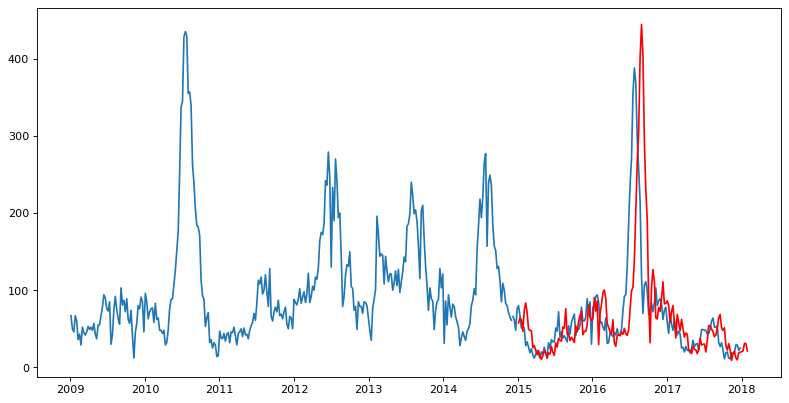

In [98]:
history = [x for x in train]
predictions = list()

stepz = 4

# walk-forward validation
for t in tqdm(range(len(test))):
    model = ARIMA(history, order=(3,1,3))
    model_fit = model.fit()
    output = model_fit.forecast(steps=stepz)
    yhat = output[stepz-1]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
#     print('predicted=%f, expected=%f' % (yhat, obs))
# evaluate forecasts
pred = pd.DataFrame(predictions, index=test[stepz:].index.union(pd.date_range(start='1/1/2018', periods=stepz, freq='W')))
rmse = np.sqrt(mean_squared_error(test[stepz:], predictions[:-stepz]))## Rolling Forecast ARIMA - 4 weeks ahead
print('Test RMSE: %.3f' % rmse)
# plot forecasts against actual outcomes
plt.figure(figsize=(12, 6), dpi=80)
plt.plot(train, color='C0')
plt.plot(test, color='C0')
plt.plot(pred, color='red')
plt.show();

## Rolling Forecast ARIMA - 12 weeks ahead

100%|██████████████████████████████| 160/160 [00:55<00:00,  2.90it/s]

Test RMSE: 92.058


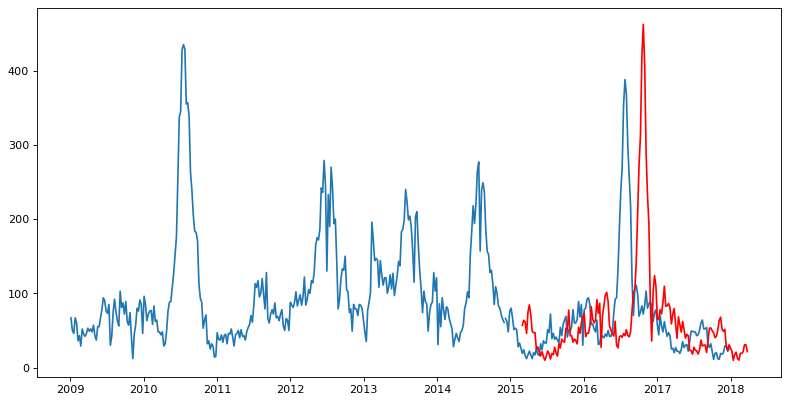

In [99]:
history = [x for x in train]
predictions = list()

stepz = 12

# walk-forward validation
for t in tqdm(range(len(test))):
    model = ARIMA(history, order=(3,1,3))## Rolling Forecast ARIMA - 4 weeks ahead
    model_fit = model.fit()
    output = model_fit.forecast(steps=stepz)
    yhat = output[stepz-1]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
#     print('predicted=%f, expected=%f' % (yhat, obs))
# evaluate forecasts
pred = pd.DataFrame(predictions, index=test[stepz:].index.union(pd.date_range(start='1/1/2018', periods=stepz, freq='W')))
rmse = np.sqrt(mean_squared_error(test[stepz:], predictions[:-stepz]))
print('Test RMSE: %.3f' % rmse)
# plot forecasts against actual outcomes
plt.figure(figsize=(12, 6), dpi=80)
plt.plot(train, color='C0')
plt.plot(test, color='C0')
plt.plot(pred, color='red')
plt.show();

## Rolling Forecast ARIMA - 4 weeks ahead

100%|██████████████████████████████| 160/160 [00:54<00:00,  2.95it/s]

Test RMSE: 62.671


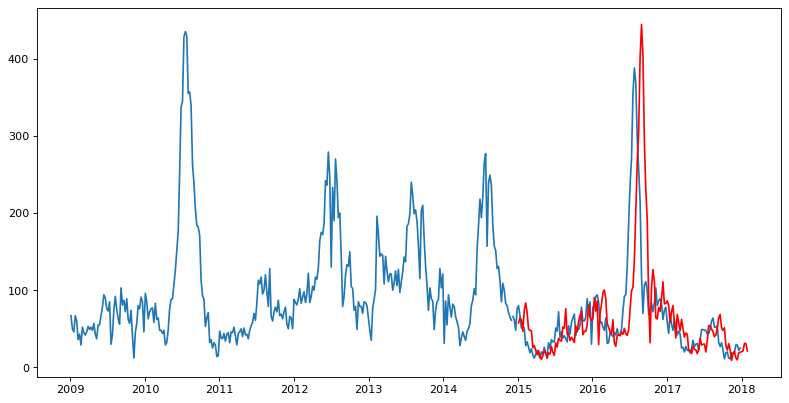

In [98]:
history = [x for x in train]
predictions = list()

stepz = 4

# walk-forward validation
for t in tqdm(range(len(test))):
    model = ARIMA(history, order=(3,1,3))
    model_fit = model.fit()
    output = model_fit.forecast(steps=stepz)
    yhat = output[stepz-1]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
#     print('predicted=%f, expected=%f' % (yhat, obs))
# evaluate forecasts
pred = pd.DataFrame(predictions, index=test[stepz:].index.union(pd.date_range(start='1/1/2018', periods=stepz, freq='W')))
rmse = np.sqrt(mean_squared_error(test[stepz:], predictions[:-stepz]))## Rolling Forecast ARIMA - 4 weeks ahead
print('Test RMSE: %.3f' % rmse)
# plot forecasts against actual outcomes
plt.figure(figsize=(12, 6), dpi=80)
plt.plot(train, color='C0')
plt.plot(test, color='C0')
plt.plot(pred, color='red')
plt.show();

## Rolling Forecast ARIMA - 12 weeks ahead

100%|██████████████████████████████| 160/160 [00:55<00:00,  2.90it/s]

Test RMSE: 92.058


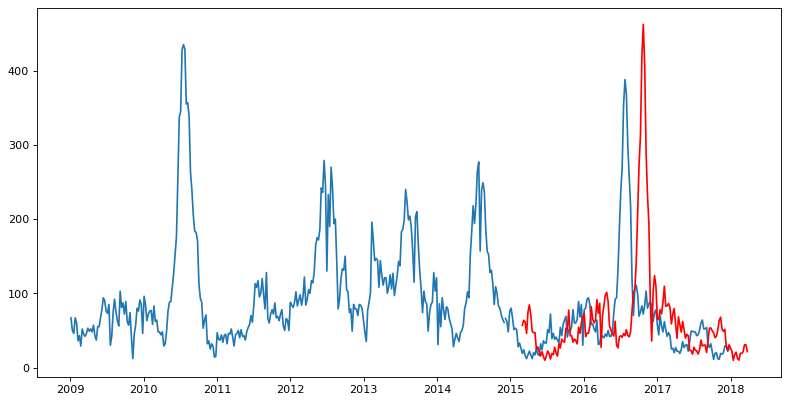

In [99]:
history = [x for x in train]
predictions = list()

stepz = 12

# walk-forward validation
for t in tqdm(range(len(test))):
    model = ARIMA(history, order=(3,1,3))## Rolling Forecast ARIMA - 4 weeks ahead
    model_fit = model.fit()
    output = model_fit.forecast(steps=stepz)
    yhat = output[stepz-1]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
#     print('predicted=%f, expected=%f' % (yhat, obs))
# evaluate forecasts
pred = pd.DataFrame(predictions, index=test[stepz:].index.union(pd.date_range(start='1/1/2018', periods=stepz, freq='W')))
rmse = np.sqrt(mean_squared_error(test[stepz:], predictions[:-stepz]))
print('Test RMSE: %.3f' % rmse)
# plot forecasts against actual outcomes
plt.figure(figsize=(12, 6), dpi=80)
plt.plot(train, color='C0')
plt.plot(test, color='C0')
plt.plot(pred, color='red')
plt.show();

## Rolling Forecast SARIMA - 1 week ahead

100%|██████████████████████████████| 160/160 [00:54<00:00,  2.94it/s]


Test RMSE: 20.275


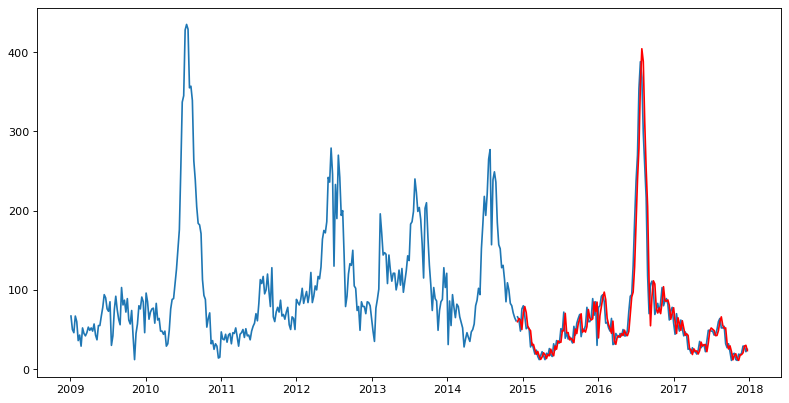

In [87]:
from tqdm import tqdm
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima.model import ARIMA

warnings.filterwarnings("ignore")

history = [x for x in train]
predictions = list()

# walk-forward validation
for t in tqdm(range(len(test))):
    model = ARIMA(history, order=(3,1,3))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
#     print('predicted=%f, expected=%f' % (yhat, obs))
# evaluate forecasts
pred = pd.DataFrame(predictions, index=test.index)
rmse = np.sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
# plot forecasts against actual outcomes
plt.figure(figsize=(12, 6), dpi=80)
plt.plot(train, color='C0')
plt.plot(test, color='C0')
plt.plot(pred, color='red')
plt.show();

## Rolling Forecast ARIMA - 4 weeks ahead

100%|██████████████████████████████| 160/160 [00:54<00:00,  2.95it/s]

Test RMSE: 62.671


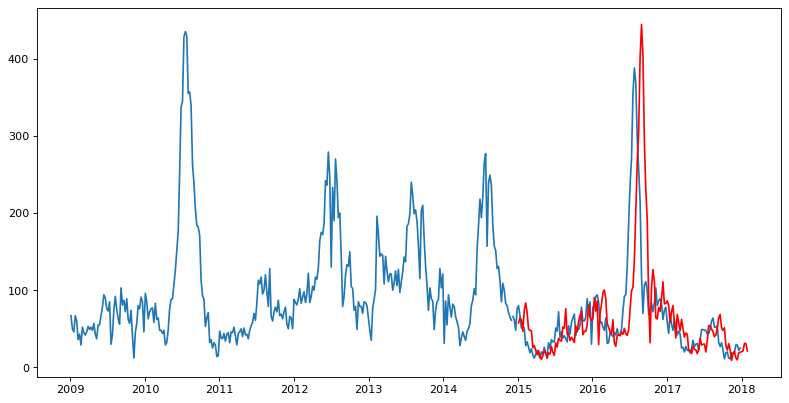

In [98]:
history = [x for x in train]
predictions = list()

stepz = 4

# walk-forward validation
for t in tqdm(range(len(test))):
    model = ARIMA(history, order=(3,1,3))
    model_fit = model.fit()
    output = model_fit.forecast(steps=stepz)
    yhat = output[stepz-1]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
#     print('predicted=%f, expected=%f' % (yhat, obs))
# evaluate forecasts
pred = pd.DataFrame(predictions, index=test[stepz:].index.union(pd.date_range(start='1/1/2018', periods=stepz, freq='W')))
rmse = np.sqrt(mean_squared_error(test[stepz:], predictions[:-stepz]))## Rolling Forecast ARIMA - 4 weeks ahead
print('Test RMSE: %.3f' % rmse)
# plot forecasts against actual outcomes
plt.figure(figsize=(12, 6), dpi=80)
plt.plot(train, color='C0')
plt.plot(test, color='C0')
plt.plot(pred, color='red')
plt.show();

## Rolling Forecast ARIMA - 12 weeks ahead

100%|██████████████████████████████| 160/160 [00:55<00:00,  2.90it/s]

Test RMSE: 92.058


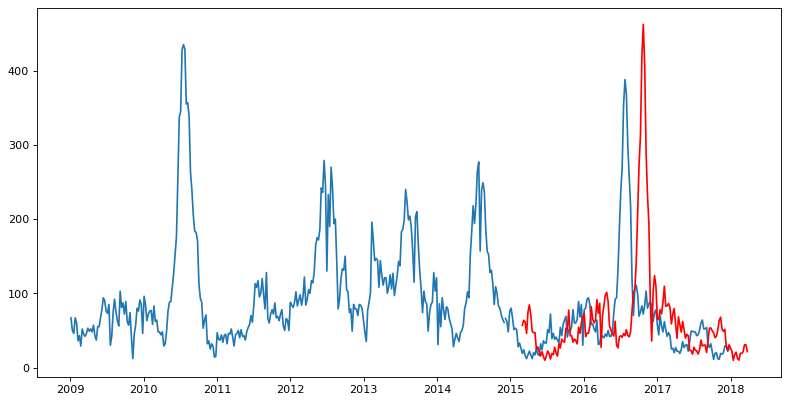

In [99]:
history = [x for x in train]
predictions = list()

stepz = 12

# walk-forward validation
for t in tqdm(range(len(test))):
    model = ARIMA(history, order=(3,1,3))## Rolling Forecast ARIMA - 4 weeks ahead
    model_fit = model.fit()
    output = model_fit.forecast(steps=stepz)
    yhat = output[stepz-1]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
#     print('predicted=%f, expected=%f' % (yhat, obs))
# evaluate forecasts
pred = pd.DataFrame(predictions, index=test[stepz:].index.union(pd.date_range(start='1/1/2018', periods=stepz, freq='W')))
rmse = np.sqrt(mean_squared_error(test[stepz:], predictions[:-stepz]))
print('Test RMSE: %.3f' % rmse)
# plot forecasts against actual outcomes
plt.figure(figsize=(12, 6), dpi=80)
plt.plot(train, color='C0')
plt.plot(test, color='C0')
plt.plot(pred, color='red')
plt.show();

### References:
#### Pipeline:
- https://www.analyticsvidhya.com/blog/2018/09/multivariate-time-series-guide-forecasting-modeling-python-codes/#:~:text=A%20Multivariate%20time%20series%20has,used%20for%20forecasting%20future%20values.
- https://www.kaggle.com/sagivmal/var-prediction-on-coronavirus-italy

#### Stationarity / Cointegration:
- https://www.youtube.com/watch?v=Pn_RiDbK82M


#### Lags:
- https://towardsdatascience.com/vector-autoregressive-for-forecasting-time-series-a60e6f168c70


#### Features / Domain Expertise:
- https://apps.who.int/iris/bitstream/handle/10665/164135/dbv29p41.pdf

In [ ]:
# # grid search sarima hyperparameters
# from math import sqrt
# from multiprocessing import cpu_count
# from joblib import Parallel
# from joblib import delayed
# from warnings import catch_warnings
# from warnings import filterwarnings
# from statsmodels.tsa.statespace.sarimax import SARIMAX
# from sklearn.metrics import mean_squared_error

# # one-step sarima forecast
# def sarima_forecast(history, config):
#     order, sorder, trend = config
#     # define model
#     model = SARIMAX(history, order=order, seasonal_order=sorder, trend=trend, enforce_stationarity=False, enforce_invertibility=False)
#     # fit model
#     model_fit = model.fit(disp=False)
#     # make one step forecast
#     yhat = model_fit.predict(len(history), len(history))
#     return yhat[0]

# # root mean squared error or rmse
# def measure_rmse(actual, predicted):
#     return sqrt(mean_squared_error(actual, predicted))

# # split a univariate dataset into train/test sets
# def train_test_split(data, n_test):
#     return data[:-n_test], data[-n_test:]

# # walk-forward validation for univariate data
# def walk_forward_validation(data, n_test, cfg):
#     predictions = list()
#     # split dataset
#     train, test = train_test_split(data, n_test)
#     # seed history with training dataset
#     history = [x for x in train]
#     # step over each time-step in the test set
#     for i in range(len(test)):
#         # fit model and make forecast for history
#         yhat = sarima_forecast(history, cfg)
#         # store forecast in list of predictions
#         predictions.append(yhat)
#         # add actual observation to history for the next loop
#         history.append(test[i])
#     # estimate prediction error
#     error = measure_rmse(test, predictions)
#     return error

# # score a model, return None on failure
# def score_model(data, n_test, cfg, debug=False):
#     result = None
#     # convert config to a key
#     key = str(cfg)
#     # show all warnings and fail on exception if debugging
#     if debug:
#         result = walk_forward_validation(data, n_test, cfg)
#     else:
#         # one failure during model validation suggests an unstable config
#         try:
#             # never show warnings when grid searching, too noisy
#             with catch_warnings():
#                 filterwarnings("ignore")
#                 result = walk_forward_validation(data, n_test, cfg)
#         except:
#             error = None
#     # check for an interesting result
#     if result is not None:
#         print(' > Model[%s] %.3f' % (key, result))
#     return (key, result)

# # grid search configs
# def grid_search(data, cfg_list, n_test, parallel=True):
#     scores = None
#     if parallel:
#         # execute configs in parallel
#         executor = Parallel(n_jobs=cpu_count(), backend='multiprocessing')
#         tasks = (delayed(score_model)(data, n_test, cfg) for cfg in cfg_list)
#         scores = executor(tasks)
#     else:
#         scores = [score_model(data, n_test, cfg) for cfg in cfg_list]
#     # remove empty results
#     scores = [r for r in scores if r[1] != None]
#     # sort configs by error, asc
#     scores.sort(key=lambda tup: tup[1])
#     return scores

# # create a set of sarima configs to try
# def sarima_configs(seasonal=[0]):
#     models = list()
#     # define config lists
#     p_params = [0, 1, 2]
#     d_params = [0, 1]
#     q_params = [0, 1, 2]
#     t_params = ['n','c','t','ct']
#     P_params = [0, 1, 2]
#     D_params = [0, 1]
#     Q_params = [0, 1, 2]
#     m_params = seasonal
#     # create config instances
#     for p in p_params:
#         for d in d_params:
#             for q in q_params:
#                 for t in t_params:
#                     for P in P_params:
#                         for D in D_params:
#                             for Q in Q_params:
#                                 for m in m_params:
#                                     cfg = [(p,d,q), (P,D,Q,m), t]
#                                     models.append(cfg)
#     return models

